# Assignment-4
# Esha Reddy Emani

In this task, we explore sophisticated methods for managing text and sequence data with recurrent neural networks (RNNs) and Transformer models. These structures are fundamental in current natural language processing (NLP) assignments and provide strong resources for text categorization, sentiment assessment, and other tasks. This assignment highlights practical tips for optimizing and evaluating models, focusing on ways to enhance performance in situations with minimal data.

We plan to expand on the IMDB sentiment analysis illustration in Chapter 6 by adjusting important factors to evaluate their impact on model accuracy. Tasks consist of changing review lengths, decreasing sample sizes for training, and evaluating various embedding methods. More precisely, we will examine the following:

* Modeling with a constrained dataset: Testing with limited data by truncating reviews at 150 words, utilizing only 100 samples for training, and validating with 10,000 samples.

* Restricting the vocabulary to the 10,000 most common words is crucial for maintaining a balance between model complexity and computational efficiency.

* Comparison of performance between using a trainable embedding layer and utilizing pre-trained word embeddings. This comparison offers information about when each method is most successful.

* Vary the amount of training samples to find the point at which a trainable embedding layer outperforms pretrained embeddings.



In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

max_features = 10000  # number of words to consider as features
maxlen = 150  # cut texts after this number of words
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Restrict training samples to 100
input_train = input_train[:100]
y_train = y_train[:100]

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Validate on 10,000 samples
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(input_test[:10000], y_test[:10000]))


Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
100 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (100, 150)
input_test shape: (25000, 150)
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - acc: 0.4500 - loss: 0.6937 - val_acc: 0.5029 - val_loss: 0.6933
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - acc: 0.5800 - loss: 0.6906 - val_acc: 0.5027 - val_loss: 0.6934
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - acc: 0.5800 - loss: 0.6884 - val_acc: 0.5027 - val_loss: 0.6936
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - acc: 0.5800 - loss: 0.6863 - val_acc: 0.5027 - val_loss: 0.6938
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step - acc: 0.5800 - loss: 0.6844 - val_acc: 0.5027 - val_loss: 0.6941
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - acc: 0.5800 - loss: 0.6824 - val_acc: 0.5027 - val_loss: 0.6944
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step - acc: 0.5800 - loss: 0.6803 - val_acc: 0.5027 - val_loss

In [2]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(input_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

Test Loss: 0.6976068615913391
Test Accuracy: 0.5


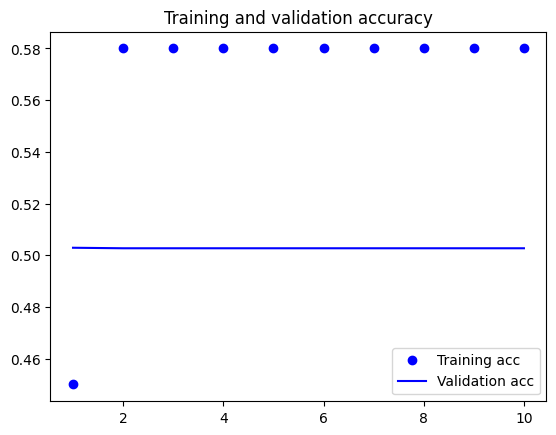

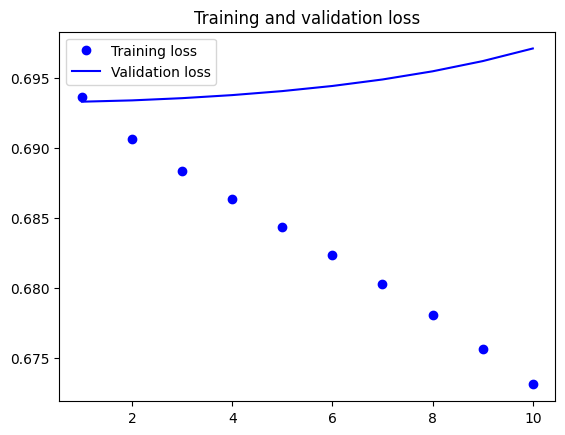

In [3]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [4]:
max_features = 10000  # number of words to consider as features
maxlen = 150  # cut texts after this number of words
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Restrict training samples to 10000
input_train = input_train[:10000]
y_train = y_train[:10000]

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Validate on 10,000 samples
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(input_test[:10000], y_test[:10000]))


Loading data...
10000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (10000, 150)
input_test shape: (25000, 150)
Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - acc: 0.5338 - loss: 0.6904 - val_acc: 0.5636 - val_loss: 0.6643
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.7151 - loss: 0.5630 - val_acc: 0.7489 - val_loss: 0.5154
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.8276 - loss: 0.3987 - val_acc: 0.8272 - val_loss: 0.4165
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.8673 - loss: 0.3205 - val_acc: 0.8489 - val_loss: 0.3490
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.8883 - loss: 0.2781 - val_acc: 0.7994 - val_loss: 0.5308
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.8936 - loss: 0.2753 - val_acc: 0.7994 - val_loss: 0.4817
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.8968 - loss: 0.2636 - val_acc: 0.8298 - val_loss: 0.3846
Epoch 8/10
79/79 ━━━━━━━━━━━

In [5]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(input_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

Test Loss: 0.37570714950561523
Test Accuracy: 0.8573600053787231


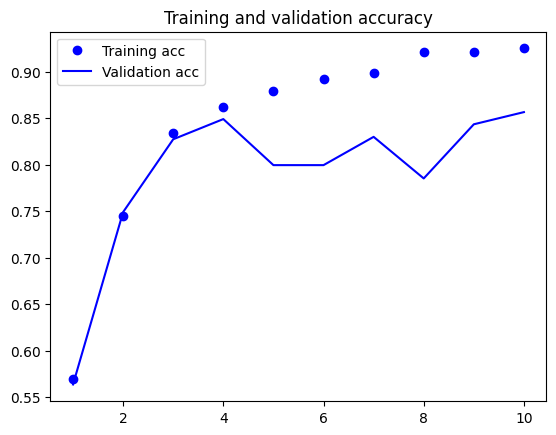

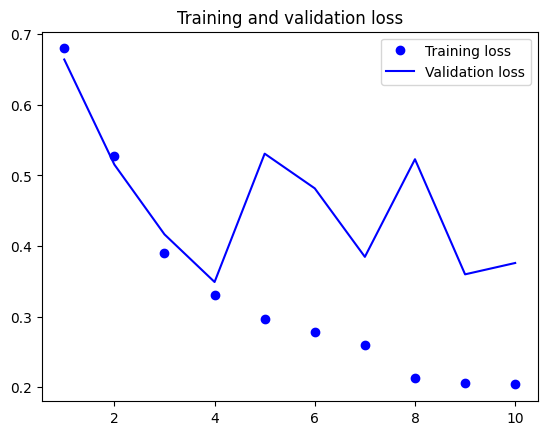

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
max_features = 10000  # number of words to consider as features
maxlen = 150  # cut texts after this number of words
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Restrict training samples to 15000
input_train = input_train[:15000]
y_train = y_train[:15000]

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Validate on 10,000 samples
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(input_test[:10000], y_test[:10000]))


Loading data...
15000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (15000, 150)
input_test shape: (25000, 150)
Epoch 1/10
118/118 [==============================] - 10s 73ms/step - loss: 0.6017 - acc: 0.6603 - val_loss: 0.4605 - val_acc: 0.7870
Epoch 2/10
118/118 [==============================] - 7s 55ms/step - loss: 0.3768 - acc: 0.8473 - val_loss: 0.3608 - val_acc: 0.8482
Epoch 3/10
118/118 [==============================] - 5s 39ms/step - loss: 0.2837 - acc: 0.8893 - val_loss: 0.3448 - val_acc: 0.8511
Epoch 4/10
118/118 [==============================] - 7s 56ms/step - loss: 0.2340 - acc: 0.9147 - val_loss: 0.3284 - val_acc: 0.8593
Epoch 5/10
118/118 [==============================] - 3s 25ms/step - loss: 0.2034 - acc: 0.9263 - val_loss: 0.3694 - val_acc: 0.8387
Epoch 6/10
118/118 [==============================] - 3s 30ms/step - loss: 0.1720 - acc: 0.9399 - val_loss: 0.3526 - val_acc: 0.8485
Epoch 7/10
118/118 [============================

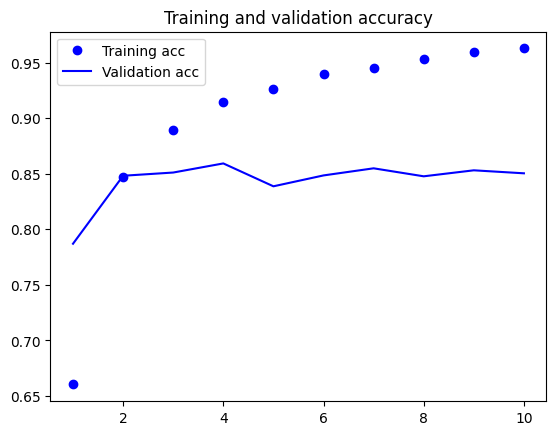

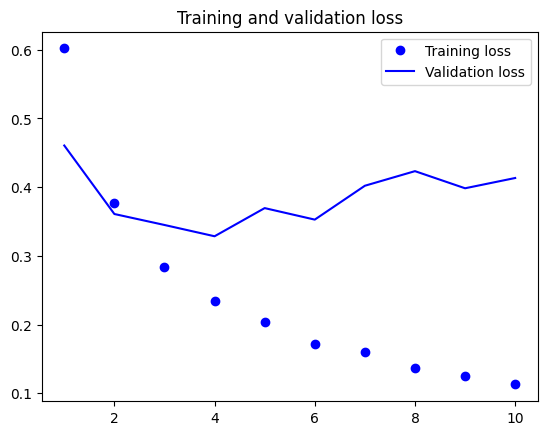

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
max_features = 10000  # number of words to consider as features
maxlen = 150  # cut texts after this number of words
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Restrict training samples to 17000
input_train = input_train[:17000]
y_train = y_train[:17000]

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Validate on 10,000 samples
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(input_test[:10000], y_test[:10000]))

Loading data...
17000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (17000, 150)
input_test shape: (25000, 150)
Epoch 1/10
133/133 [==============================] - 12s 70ms/step - loss: 0.6274 - acc: 0.6304 - val_loss: 0.4946 - val_acc: 0.7869
Epoch 2/10
133/133 [==============================] - 7s 52ms/step - loss: 0.3883 - acc: 0.8409 - val_loss: 0.3753 - val_acc: 0.8457
Epoch 3/10
133/133 [==============================] - 5s 34ms/step - loss: 0.2887 - acc: 0.8879 - val_loss: 0.3200 - val_acc: 0.8648
Epoch 4/10
133/133 [==============================] - 6s 43ms/step - loss: 0.2381 - acc: 0.9084 - val_loss: 0.3393 - val_acc: 0.8604
Epoch 5/10
133/133 [==============================] - 4s 30ms/step - loss: 0.2058 - acc: 0.9234 - val_loss: 0.4221 - val_acc: 0.8378
Epoch 6/10
133/133 [==============================] - 3s 22ms/step - loss: 0.1813 - acc: 0.9363 - val_loss: 0.3406 - val_acc: 0.8606
Epoch 7/10
133/133 [============================

In [7]:
max_features = 10000  # number of words to consider as features
maxlen = 150  # cut texts after this number of words
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Restrict training samples to 17485
input_train = input_train[:17485]
y_train = y_train[:17485]

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Validate on 10,000 samples
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(input_test[:10000], y_test[:10000]))

Loading data...
17485 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (17485, 150)
input_test shape: (25000, 150)
Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - acc: 0.5832 - loss: 0.6612 - val_acc: 0.8158 - val_loss: 0.4150
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.8123 - loss: 0.4267 - val_acc: 0.8370 - val_loss: 0.3781
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - acc: 0.8643 - loss: 0.3296 - val_acc: 0.8525 - val_loss: 0.3436
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - acc: 0.8782 - loss: 0.2928 - val_acc: 0.7228 - val_loss: 0.6513
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - acc: 0.8823 - loss: 0.2882 - val_acc: 0.8577 - val_loss: 0.3346
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.9068 - loss: 0.2386 - val_acc: 0.8516 - val_loss: 0.3802
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.9109 - loss: 0.2294 - val_acc: 0.8587 - val_loss: 0.3370
Epoch 8/10
137

Test Loss: 0.40015122294425964
Test Accuracy: 0.8442800045013428


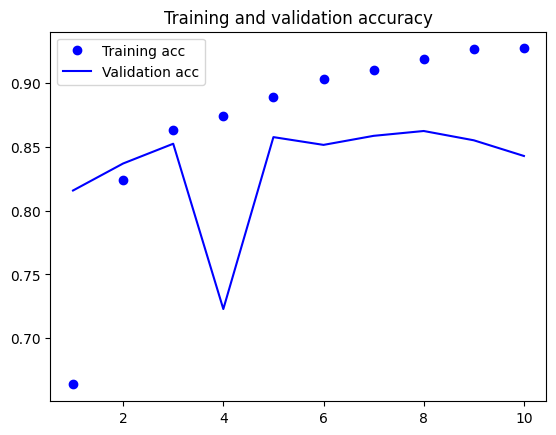

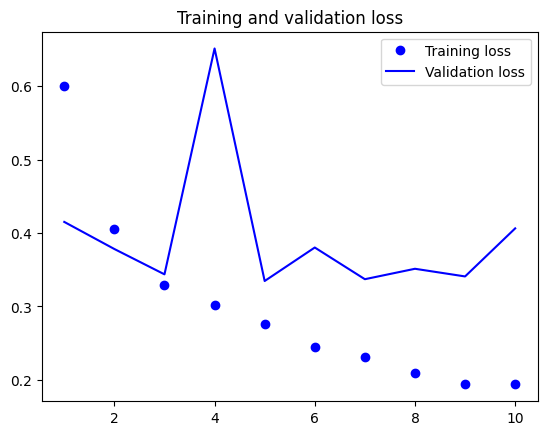

In [8]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(input_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
max_features = 10000  # number of words to consider as features
maxlen = 150  # cut texts after this number of words
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Restrict training samples to 25000
input_train = input_train[:25000]
y_train = y_train[:25000]

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Validate on 10,000 samples
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(input_test[:10000], y_test[:10000]))


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 150)
input_test shape: (25000, 150)
Epoch 1/10
196/196 [==============================] - 15s 65ms/step - loss: 0.5457 - acc: 0.7050 - val_loss: 0.4485 - val_acc: 0.7978
Epoch 2/10
196/196 [==============================] - 8s 40ms/step - loss: 0.3190 - acc: 0.8670 - val_loss: 0.3920 - val_acc: 0.8526
Epoch 3/10
196/196 [==============================] - 5s 28ms/step - loss: 0.2597 - acc: 0.8962 - val_loss: 0.3118 - val_acc: 0.8716
Epoch 4/10
196/196 [==============================] - 4s 19ms/step - loss: 0.2266 - acc: 0.9134 - val_loss: 0.3909 - val_acc: 0.8269
Epoch 5/10
196/196 [==============================] - 4s 23ms/step - loss: 0.2009 - acc: 0.9277 - val_loss: 0.3682 - val_acc: 0.8502
Epoch 6/10
196/196 [==============================] - 3s 14ms/step - loss: 0.1862 - acc: 0.9311 - val_loss: 0.3593 - val_acc: 0.8600
Epoch 7/10
196/196 [============================

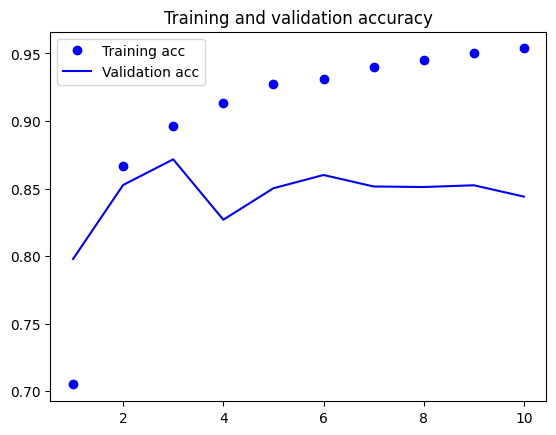

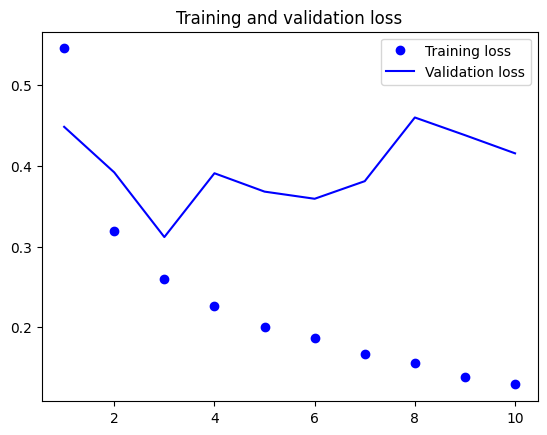

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xvf /content/drive/MyDrive/aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [ ]:
import os

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 150  # Cutoff reviews after 150 words
training_samples = 100  # Restrict training samples to 100
validation_samples = 10000  # Validate on 10,000 samples
max_words = 10000  # Consider only the top 10,000 words

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where samples are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Using a pretrained word embedding

In [ ]:
glove_dir = '/content/drive/MyDrive/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 15000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                480032    
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
4/4 [==============================] - 2s 270ms/step - loss: 7.7446 - acc: 0.4900 - val_loss: 0.7068 - val_acc: 0.5457
Epoch 2/10
4/4 [==============================] - 1s 209ms/step - loss: 0.4886 - acc: 0.7400 - val_loss: 0.7049 - val_acc: 0.5587
Epoch 3/10
4/4 [==============================] - 1s 210ms/step - loss: 0.1517 - acc: 0.9900 - val_loss: 0.7093 - val_acc: 0.5656
Epoch 4/10
4/4 [==============================] - 1s 219ms/step - loss: 0.0773 - acc: 0.9900 - val_loss: 1.3008 - val_acc: 0.5037
Epoch 5/10
4/4 [==============================] - 1s 219ms/step - loss: 0.0885 - acc: 0.9900 - val_loss: 1.7735 - val_acc: 0.5018
Epoch 6/10
4/4 [==============================] - 1s 235ms/step - loss: 0.3451 - acc: 0.8200 - val_loss: 0.8210 - val_acc: 0.5381
Epoch 7/10
4/4 [==============================] - 1s 437ms/step - loss: 0.0289 - acc: 1.0000 - val_loss: 0.8796 - val_acc: 0.5392
Epoch 8/10
4/4 [==============================] - 1s 312ms/step - loss: 0.0148 - acc: 1.00

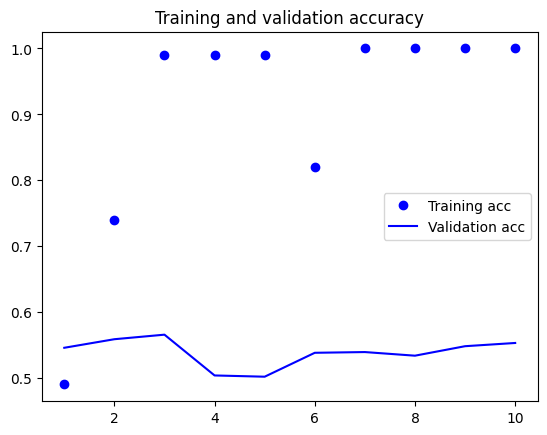

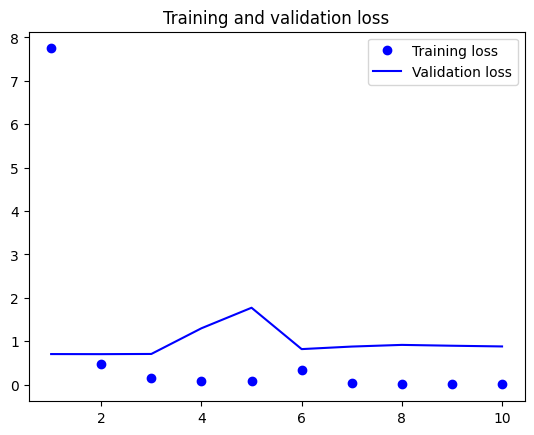

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 15000)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                480032    
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 2s 401ms/step - loss: 0.6942 - acc: 0.5400 - val_loss: 0.6928 - val_acc: 0.5079
Epoch 2/10
4/4 [==

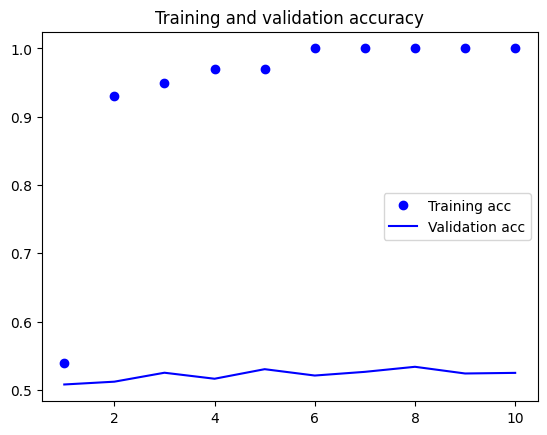

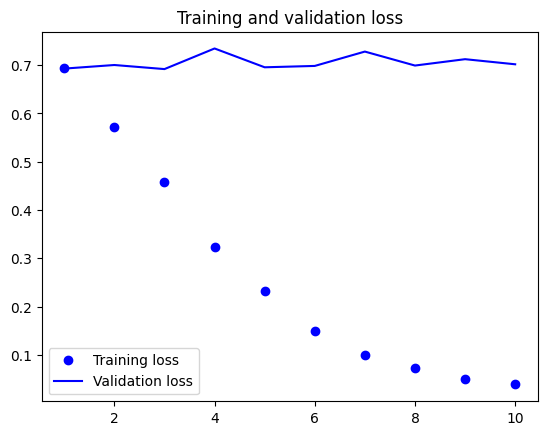

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [ ]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.8953 - acc: 0.5433


[0.8953317999839783, 0.5433200001716614]

Usign the above model with more training samples

In [ ]:

maxlen = 150  # Cutoff reviews after 150 words
training_samples = 10000  # Restrict training samples to 10000
validation_samples = 10000  # Validate on 10,000 samples
max_words = 10000  # Consider only the top 10,000 words

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where samples are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 87393 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [ ]:
glove_dir = '/content/drive/MyDrive/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_2 (Flatten)         (None, 15000)             0         
                                                                 
 dense_8 (Dense)             (None, 32)                480032    
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/100
313/313 [==============================] - 3s 8ms/step - loss: 0.7457 - acc: 0.5034 - val_loss: 0.6932 - val_acc: 0.5013
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 0.7016 - acc: 0.5037 - val_loss: 0.6950 - val_acc: 0.5012
Epoch 3/100
313/313 [==============================] - 2s 5ms/step - loss: 0.6919 - acc: 0.5170 - val_loss: 0.6932 - val_acc: 0.5029
Epoch 4/100
313/313 [==============================] - 2s 6ms/step - loss: 0.6757 - acc: 0.5600 - val_loss: 0.7042 - val_acc: 0.5272
Epoch 5/100
313/313 [==============================] - 2s 6ms/step - loss: 0.6035 - acc: 0.6625 - val_loss: 0.8014 - val_acc: 0.5285
Epoch 6/100
313/313 [==============================] - 2s 5ms/step - loss: 0.5261 - acc: 0.7276 - val_loss: 0.7734 - val_acc: 0.5667
Epoch 7/100
313/313 [==============================] - 2s 5ms/step - loss: 0.4345 - acc: 0.7934 - val_loss: 0.8482 - val_acc: 0.5584
Epoch 8/100
313/313 [==============================] - 2s 8ms/step - 

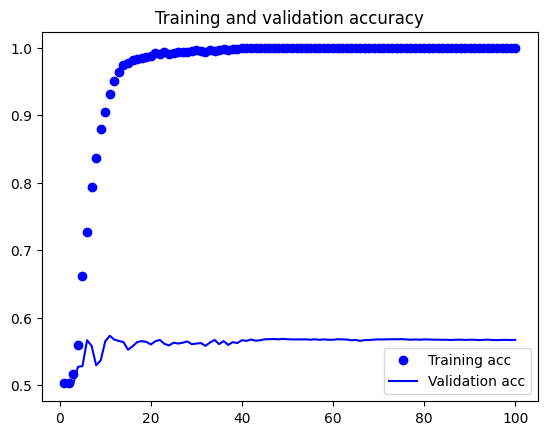

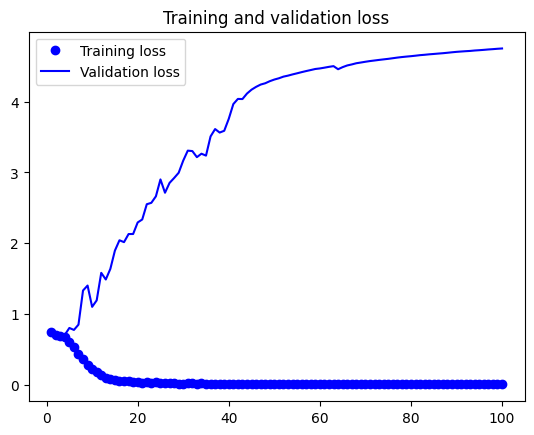

In [ ]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 4.8236 - acc: 0.5702


[4.823619365692139, 0.5702000260353088]